In [ ]:
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for checking the model accuracy
from sklearn import metrics

#To plot the graph embedded in the notebook
%matplotlib inline

In [ ]:
#Loading and printing the dataset 
df=pd.read_csv("F:\\Python\\Project\\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
#checking information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
#checking unique values for every column
print("Gender",df['gender'].unique())
print("Age",df['age'].unique())
print("Hypertension",df['hypertension'].unique())
print("Heart disease",df['heart_disease'].unique())
print("Smoking history",df['smoking_history'].unique())
print("Bmi",df['bmi'].unique())
print("HbA1c level",df['HbA1c_level'].unique())
print("Blood glucose level",df['blood_glucose_level'].unique())

Gender ['Female' 'Male' 'Other']
Age [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Hypertension [0 1]
Heart disease [1 0]
Smoking history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Bmi [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c level [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
Blood glucose level [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]


In [5]:
#Removing empty rows in the data set
df.dropna(inplace = True)

In [6]:
#Droping the rows that has 'No Info' on smoking history column
for i in df.index:
    if df.loc[i,'smoking_history']=='No Info':
        df.drop(i,inplace=True)

In [7]:
#Checking information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64184 non-null  object 
 1   age                  64184 non-null  float64
 2   hypertension         64184 non-null  int64  
 3   heart_disease        64184 non-null  int64  
 4   smoking_history      64184 non-null  object 
 5   bmi                  64184 non-null  float64
 6   HbA1c_level          64184 non-null  float64
 7   blood_glucose_level  64184 non-null  int64  
 8   diabetes             64184 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
#Return numerical summary of each attribute 
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000
mean,46.544112,0.097890,0.047037,28.424120,5.564281,139.628225,0.109778
std,19.540334,0.297169,0.211719,6.516199,1.095519,42.165904,0.312615
min,0.160000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,0.000000,0.000000,31.100000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


In [9]:
#If the value of age is less than 1, set it to 1
for x in df.index:
    if df.loc[x, "age"] < 1:
        df.loc[x, "age"] = 1

#If the value of age is less than 6 and they have smkoing history (except never) drop the row
for x in df.index:
    if df.loc[x, "age"] < 9:
        if df.loc[x,'smoking_history']=='current' or df.loc[x,'smoking_history']=="former" or df.loc[x,'smoking_history']=="ever" or df.loc[x,'smoking_history']=="not current":
            df.drop(x, inplace=True)
            
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
#print dataset
#print(newdf.to_string())

In [11]:
#Removing duplicates values 
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63068 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               63068 non-null  object 
 1   age                  63068 non-null  float64
 2   hypertension         63068 non-null  int64  
 3   heart_disease        63068 non-null  int64  
 4   smoking_history      63068 non-null  object 
 5   bmi                  63068 non-null  float64
 6   HbA1c_level          63068 non-null  float64
 7   blood_glucose_level  63068 non-null  int64  
 8   diabetes             63068 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.8+ MB


In [12]:
#checking unique values for diabetes column
print("diabetes",df['diabetes'].unique())

diabetes [0 1]


In [13]:
# replace the target values with new names
df['diabetes'] = df['diabetes'].replace([0, 1], ['Negative', 'Positive'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,Negative
2,Male,28.0,0,0,never,27.32,5.7,158,Negative
3,Female,36.0,0,0,current,23.45,5.0,155,Negative
4,Male,76.0,1,1,current,20.14,4.8,155,Negative
5,Female,20.0,0,0,never,27.32,6.6,85,Negative
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,Negative
99993,Female,40.0,0,0,never,40.69,3.5,155,Negative
99997,Male,66.0,0,0,former,27.83,5.7,155,Negative
99998,Female,24.0,0,0,never,35.42,4.0,100,Negative


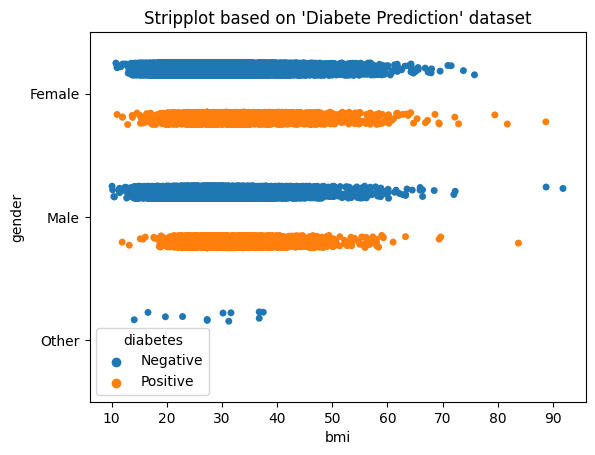

In [14]:
sns.stripplot(x='bmi', y='gender', data=df,
             jitter=True,
             hue='diabetes',
             dodge=True)
plt.title("Stripplot based on 'Diabete Prediction' dataset"); 

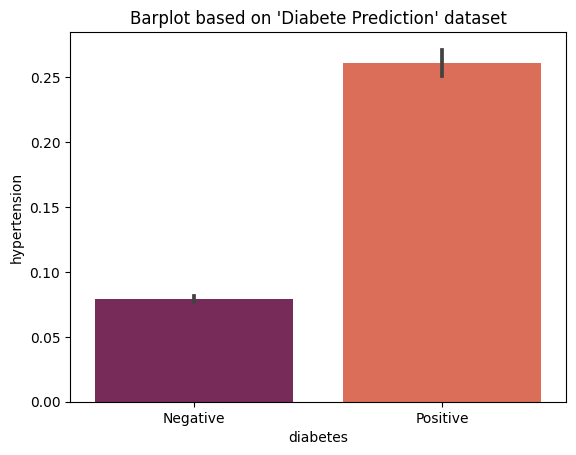

In [15]:
sns.barplot(x="diabetes", y="hypertension", data=df, palette="rocket")
plt.title("Barplot based on 'Diabete Prediction' dataset");

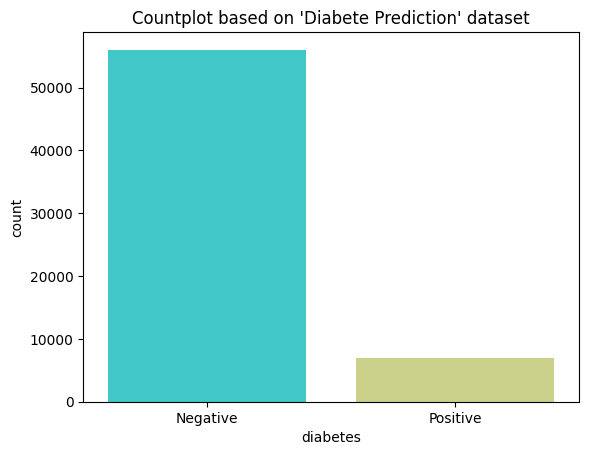

In [16]:
sns.countplot(x="diabetes", data=df, palette="rainbow")
plt.title("Countplot based on 'Diabete Prediction' dataset");

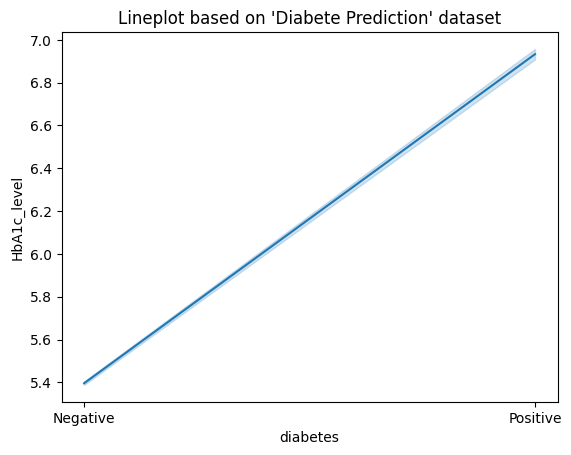

In [17]:
sns.lineplot(x='diabetes', y='HbA1c_level', data=df)
plt.title("Lineplot based on 'Diabete Prediction' dataset");

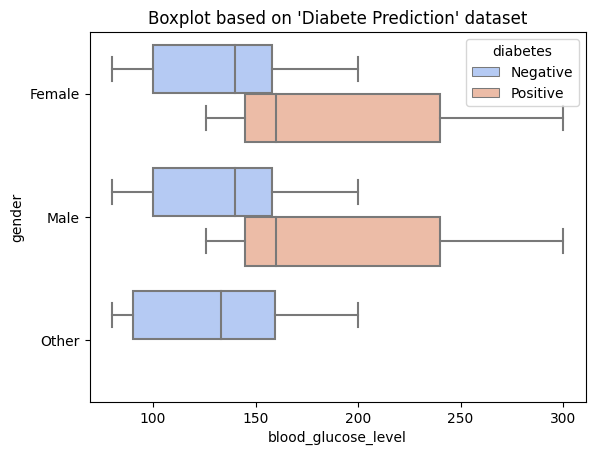

In [18]:
sns.boxplot(x="blood_glucose_level", y="gender", data=df, hue="diabetes", palette="coolwarm")
plt.title("Boxplot based on 'Diabete Prediction' dataset");

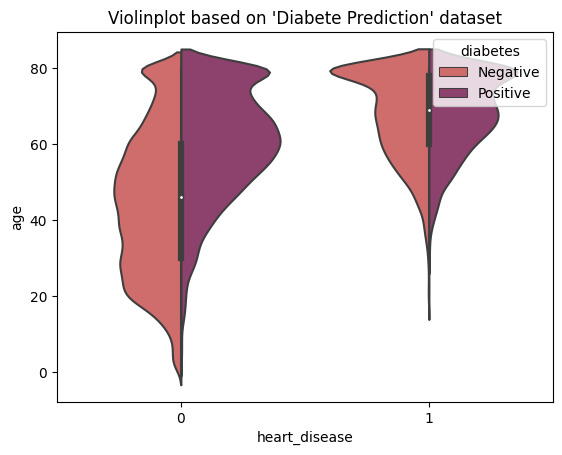

In [19]:
sns.violinplot(x='heart_disease', y='age', data=df,hue='diabetes',split=True, palette="flare")
plt.title("Violinplot based on 'Diabete Prediction' dataset");

In [20]:
#converting categorical to continuous
df['gender'] = df['gender'].replace(['Male', 'Female', 'Other'], [1, 2, 0])
df['smoking_history'] = df['smoking_history'].replace(['never', 'current', 'former', 'ever', 'not current'], [0, 1, 2, 3, 4])

<Axes: >

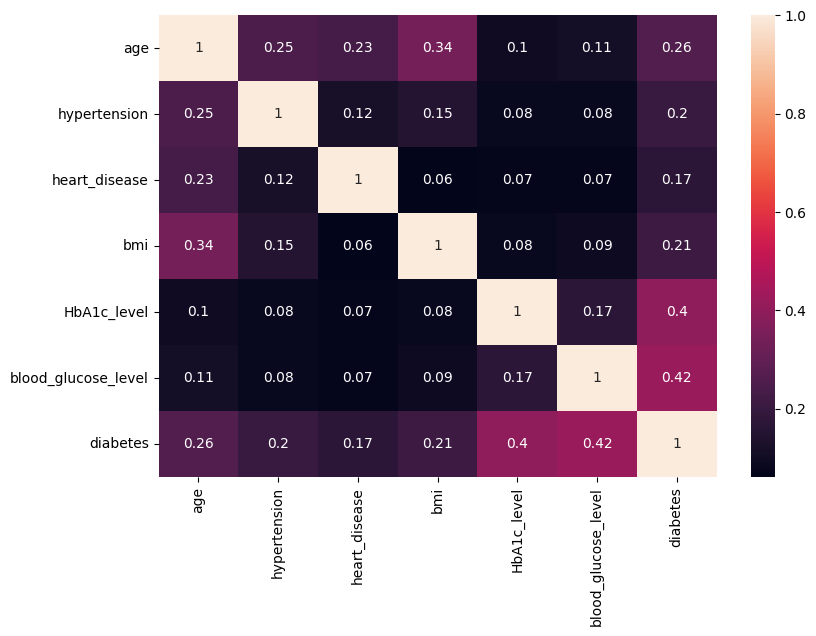

In [ ]:
 # corr() to calculate the correlation between variables
correlation_matrix = df.corr().round(2)
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

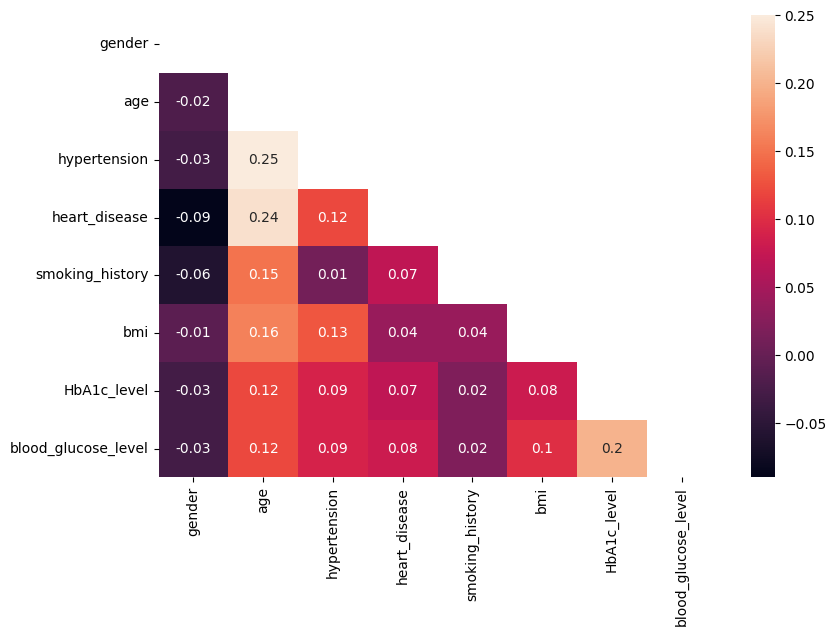

In [22]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

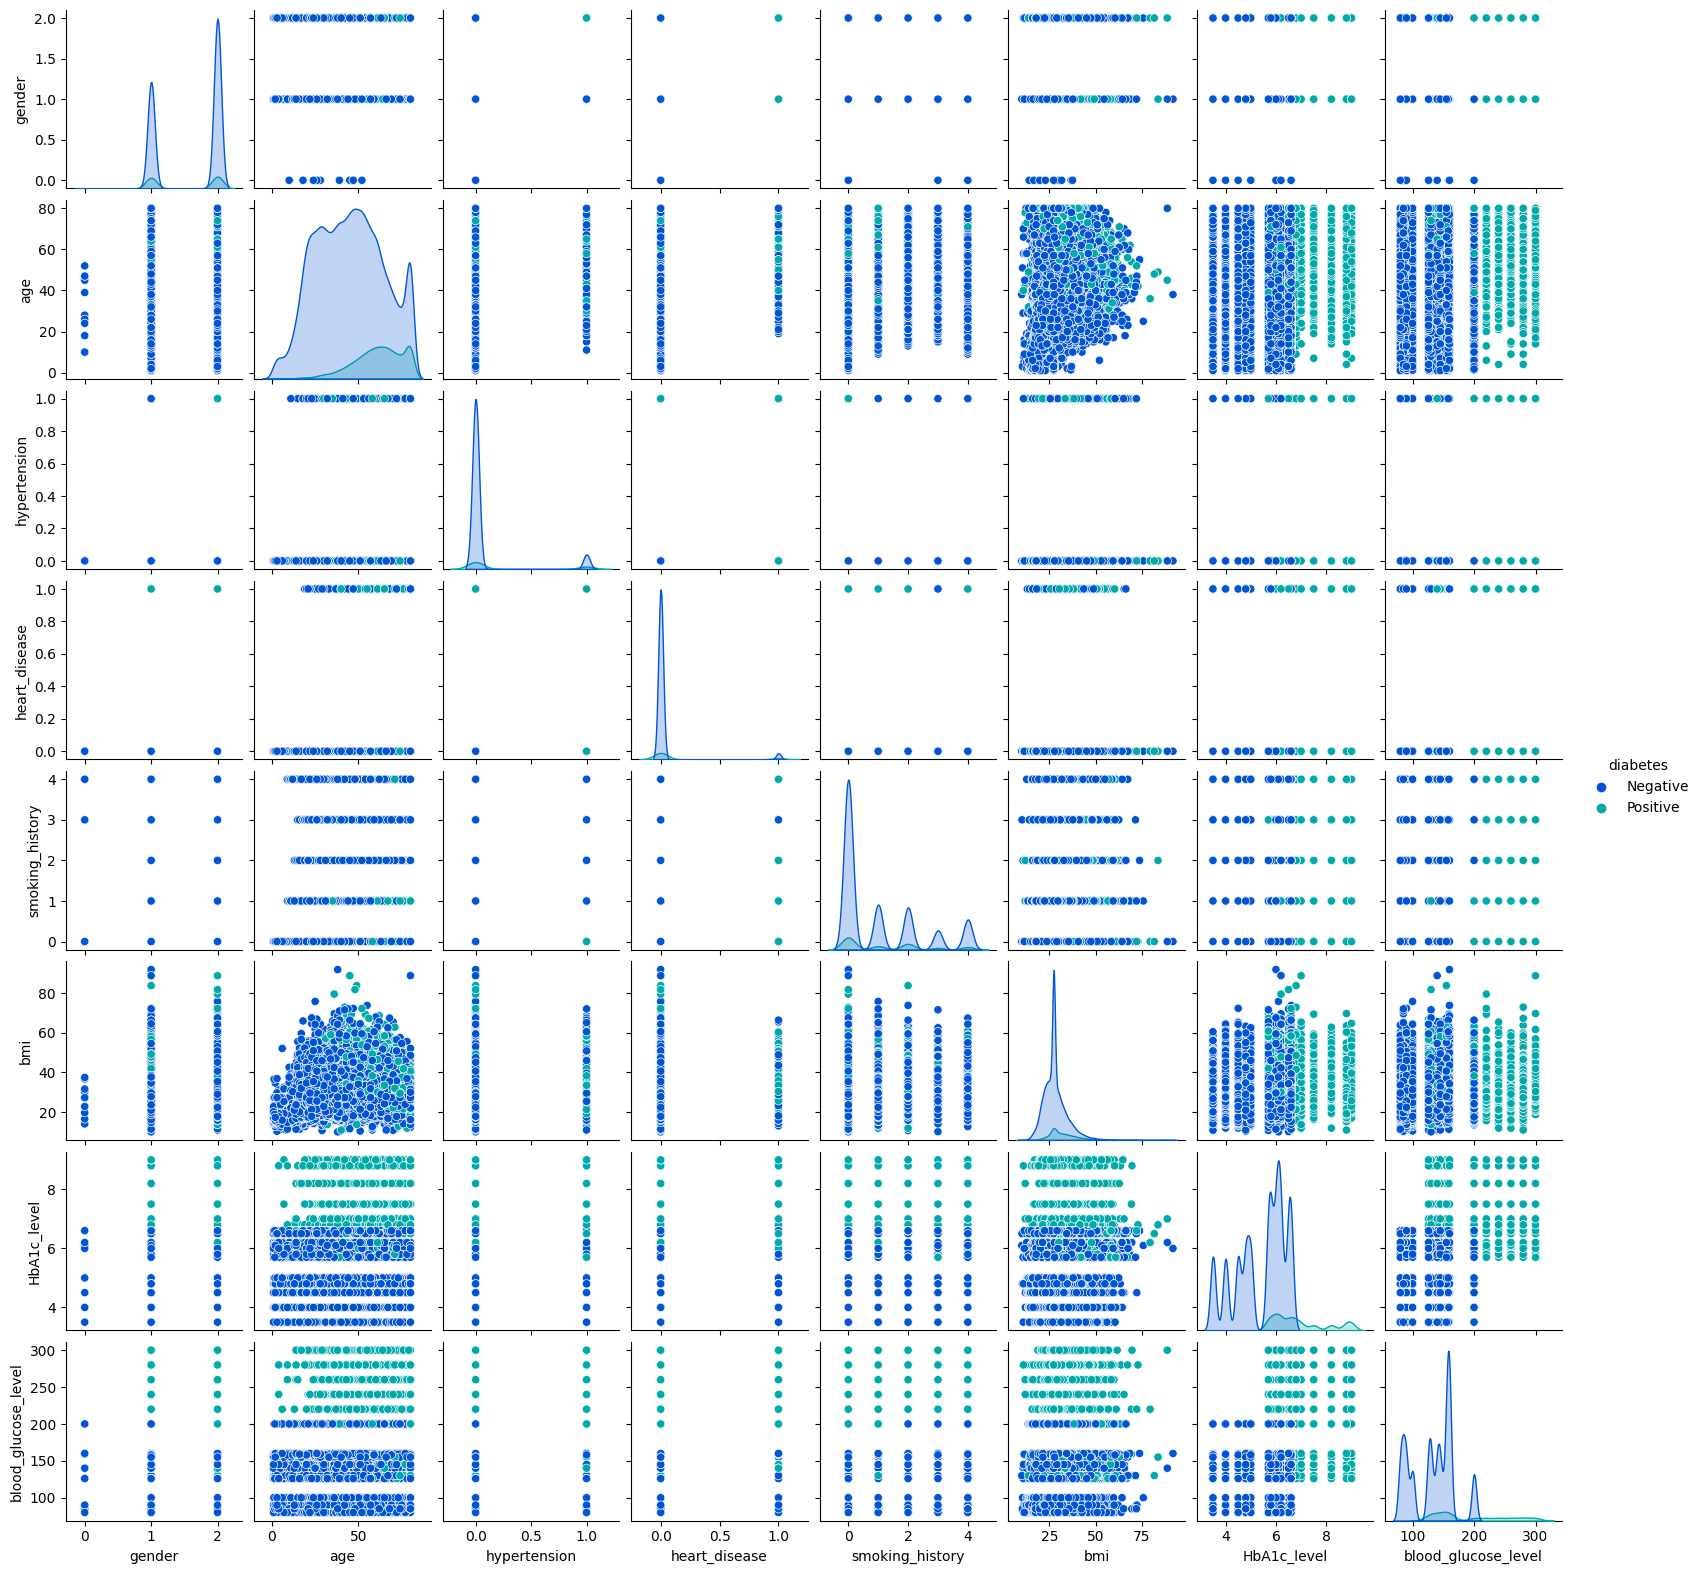

In [23]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(df, hue="diabetes", height = 2, palette = 'winter');

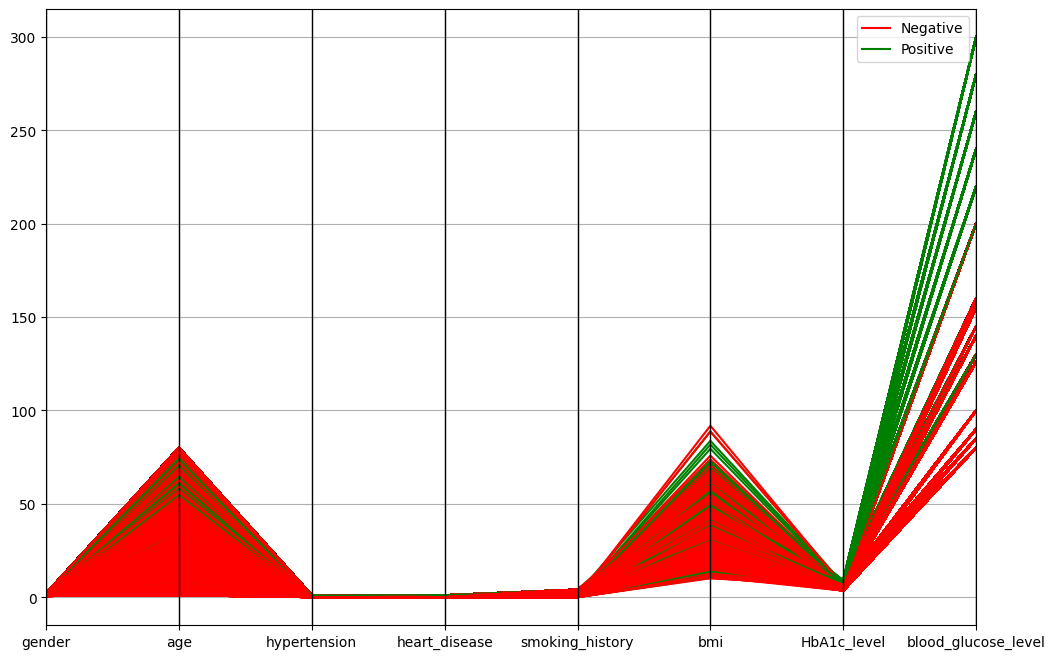

In [24]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,8))
parallel_coordinates(df, "diabetes", color = ['red', 'green'])
plt.show()

In [25]:
# Feature matrix
X = df[['gender', 'age', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
X

,gender,age,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,2,80.0,1,0,25.19,6.6,140
2,1,28.0,0,0,27.32,5.7,158
3,2,36.0,0,1,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155
5,2,20.0,0,0,27.32,6.6,85
...,...,...,...,...,...,...,...
99992,2,26.0,0,0,34.34,6.5,160
99993,2,40.0,0,0,40.69,3.5,155
99997,1,66.0,0,2,27.83,5.7,155
99998,2,24.0,0,0,35.42,4.0,100


In [26]:
# Target variable
y = df['diabetes']
y

0        Negative
2        Negative
3        Negative
4        Negative
5        Negative
           ...   
99992    Negative
99993    Negative
99997    Negative
99998    Negative
99999    Negative
Name: diabetes, Length: 63068, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (44147, 7)
X_test shape:  (18921, 7)
y_train shape:  (44147,)
y_test shape:  (18921,)


In [28]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score = set()
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.9187
---------------------------------


In [29]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9341
----------------------------------


In [30]:
 # importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.9371
---------------------------------


In [31]:
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression(max_iter = 100000)
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.9483
---------------------------------


In [32]:
# importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9304
----------------------------------


In [33]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)

The accuracy scores of different Models:
----------------------------------------
('DT', 0.9371)
('KNN', 0.9341)
('LR', 0.9483)
('SVM', 0.9304)
('NB', 0.9187)
